# Adjusting Hyper Parameters of DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

In [4]:
blobs1 = pd.read_csv("cluster_two_blobs.csv")

blobs2 = pd.read_csv("cluster_two_blobs_outliers.csv")

### Blobs Without Outliers:

In [5]:
blobs1.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [6]:
blobs1.shape

(1000, 2)

In [7]:
blobs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [8]:
blobs1.describe()

,X1,X2
count,1000.000000,1000.000000
mean,-4.520520,-2.573348
std,4.917359,4.007334
min,-10.994381,-8.529507
25%,-9.443122,-6.535837
50%,-4.170365,-2.534595
75%,0.377097,1.395594
max,1.772096,2.932075


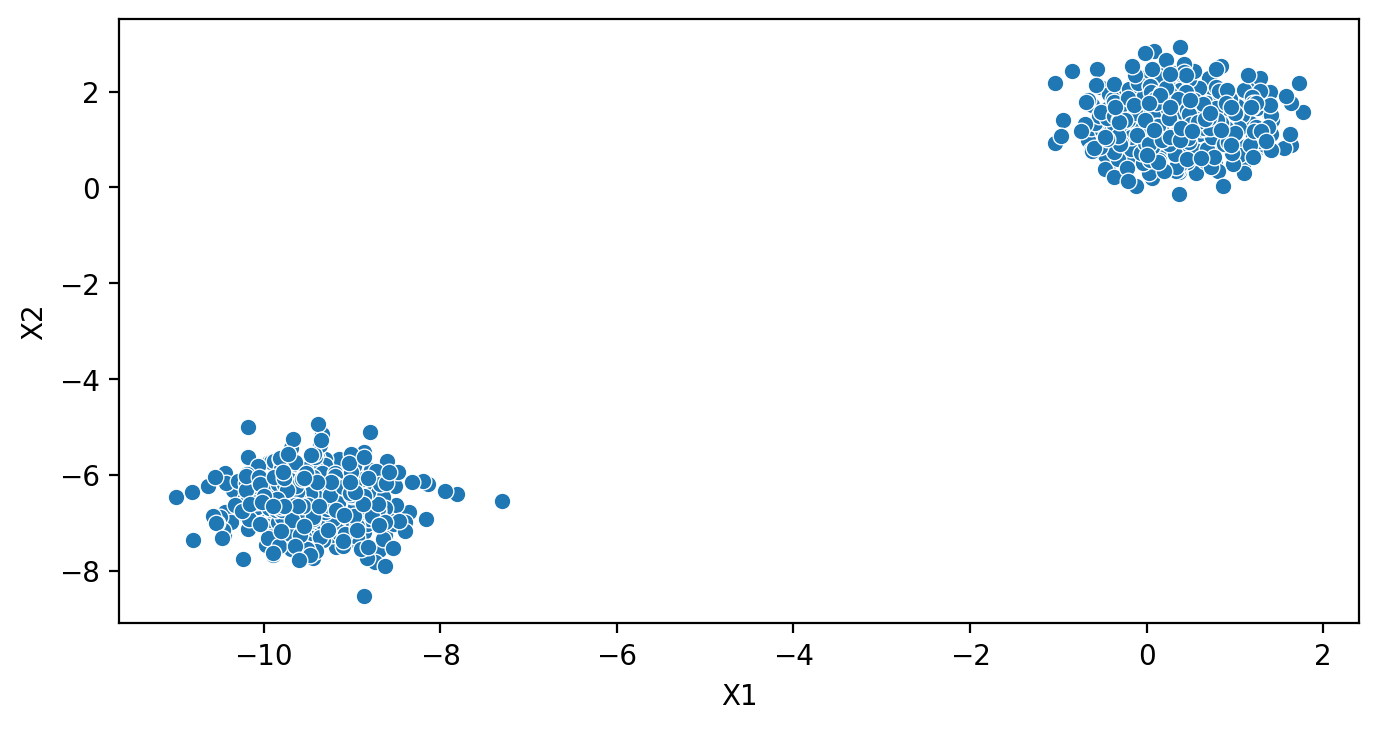

In [9]:
plt.figure(figsize= (8,4), dpi= 200)
sns.scatterplot(data= blobs1, x= "X1", y="X2")
plt.show()

### Blobs With Outliers:

In [10]:
blobs2.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [11]:
blobs2.shape

(1003, 2)

In [12]:
blobs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1003 non-null   float64
 1   X2      1003 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [13]:
blobs2.describe()

,X1,X2
count,1003.000000,1003.000000
mean,-4.518963,-2.575621
std,4.913326,4.005867
min,-10.994381,-8.529507
25%,-9.441817,-6.536523
50%,-4.000000,-2.000000
75%,0.375555,1.392050
max,1.772096,2.932075


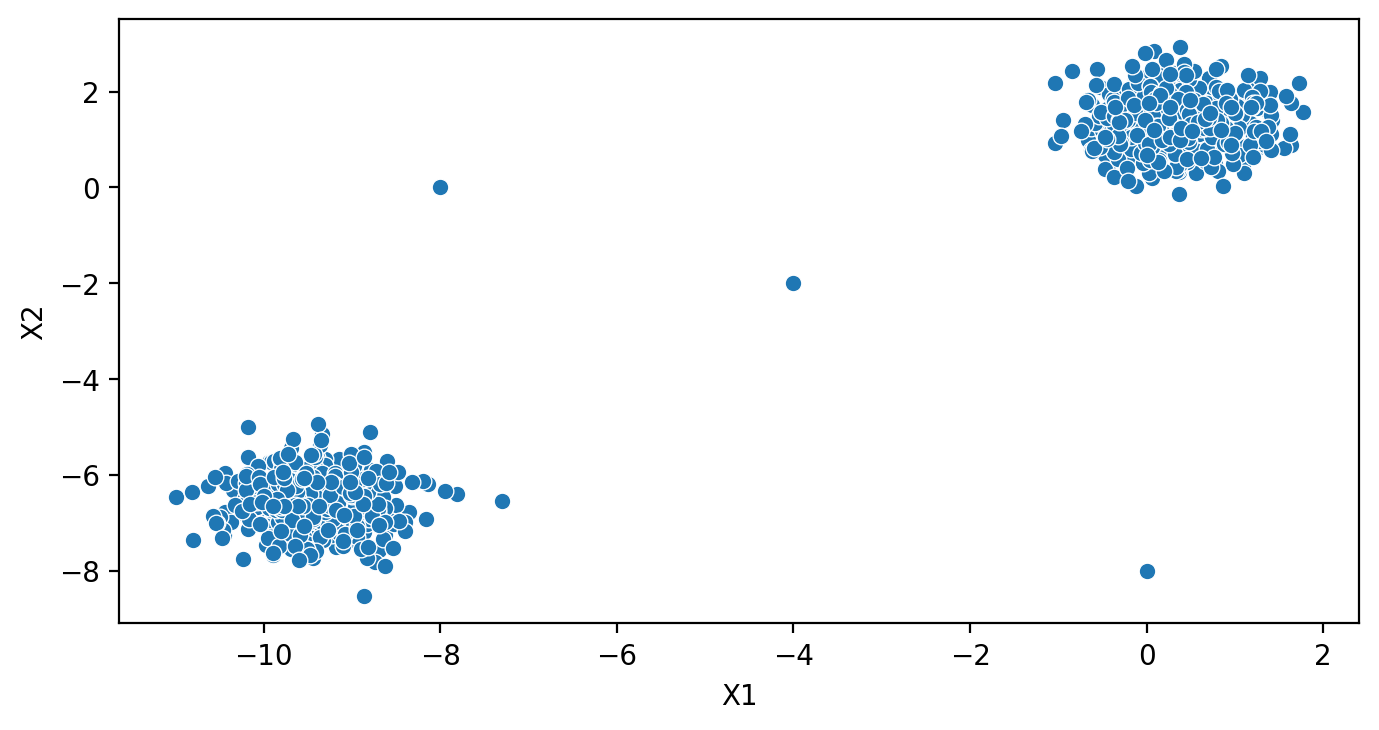

In [14]:
plt.figure(figsize= (8,4), dpi= 200)
sns.scatterplot(data= blobs2, x= "X1", y="X2")
plt.show()

### Function for Displaying Clusters:

In [16]:
def display_clusters(model, data):
    
    clusters = model.fit_predict(data)
    
    plt.figure(figsize= (8,4), dpi= 200)
    sns.scatterplot(data= data, x= "X1", y="X2", hue= clusters, palette= "dark")
    plt.show()

### Hyper Parameters of DBSCAN:

There are Two Main Hyper Parameters that we are concerned with:

    - eps : The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function. (Default is eps = 0.5)
    
    - min_samples : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. (Default is min_samples = 5)

In [15]:
# Let's Try DBSCAN with default values for both parameters on both Datasets:

dbscan = DBSCAN()

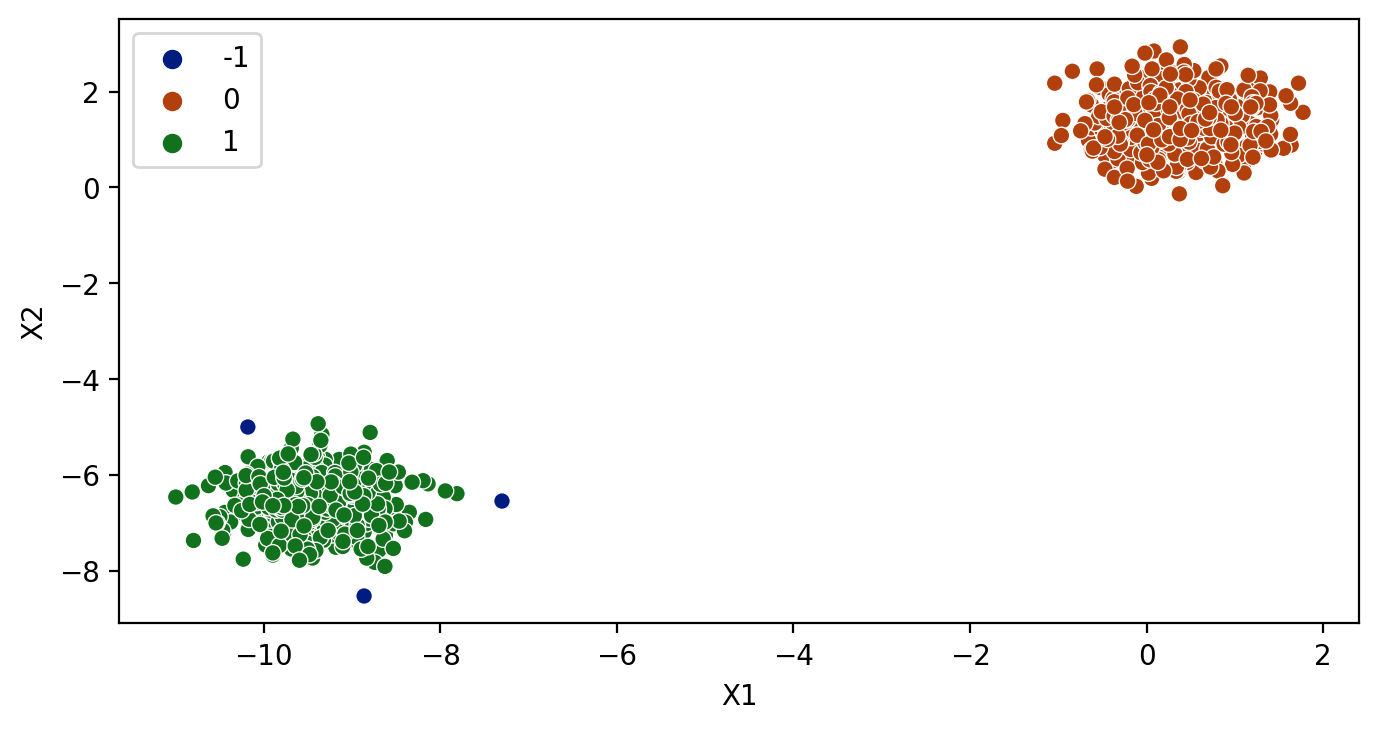

In [17]:
display_clusters(dbscan, blobs1)

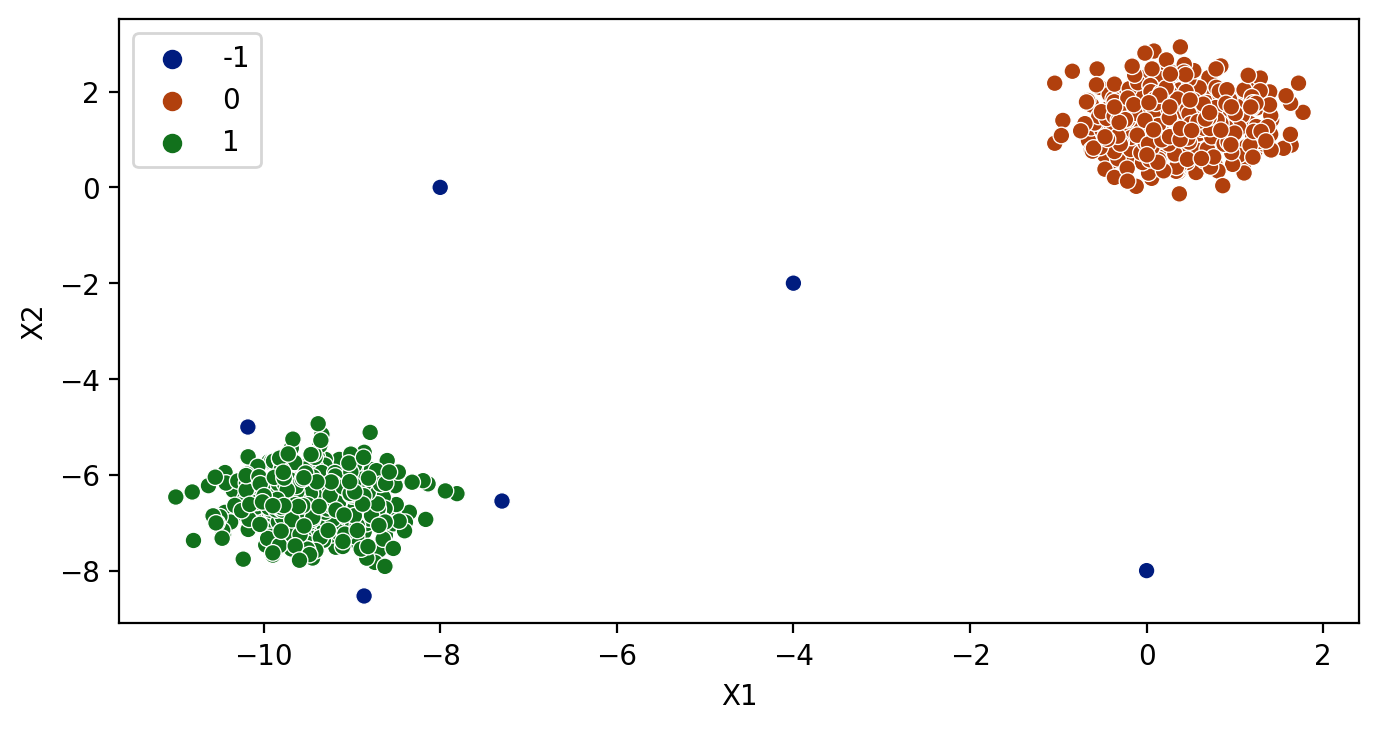

In [18]:
display_clusters(dbscan, blobs2)

In [19]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)

dbscan = DBSCAN(eps= 0.001)

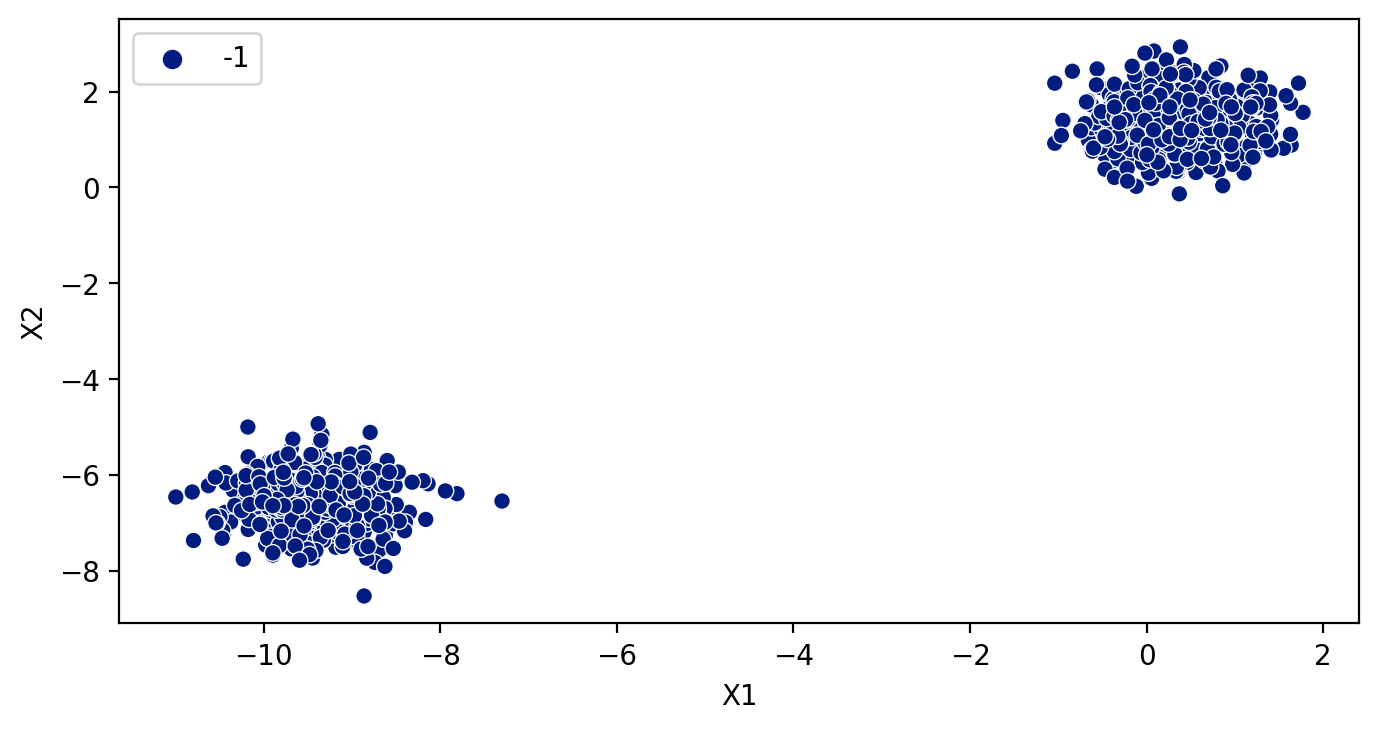

In [20]:
display_clusters(dbscan, blobs1)

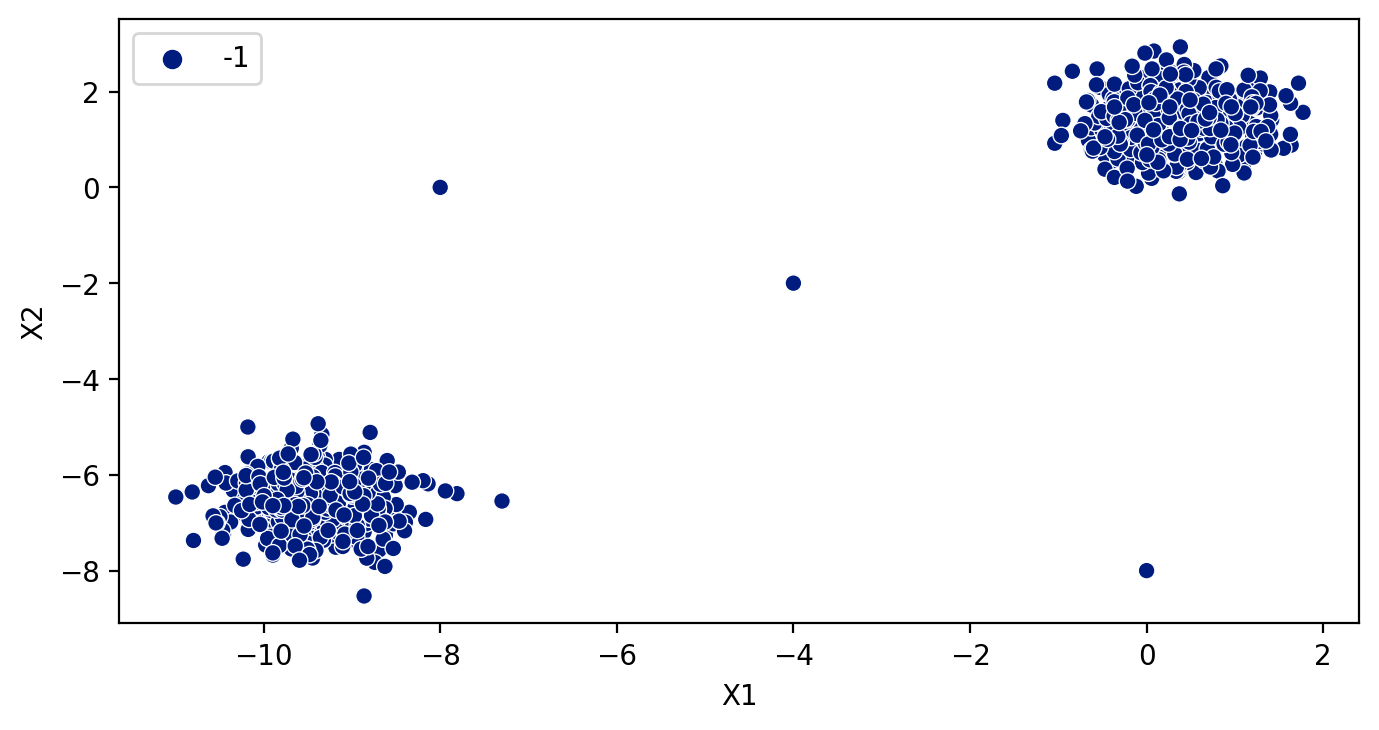

In [21]:
display_clusters(dbscan, blobs2)

In [22]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)

dbscan = DBSCAN(eps= 10)

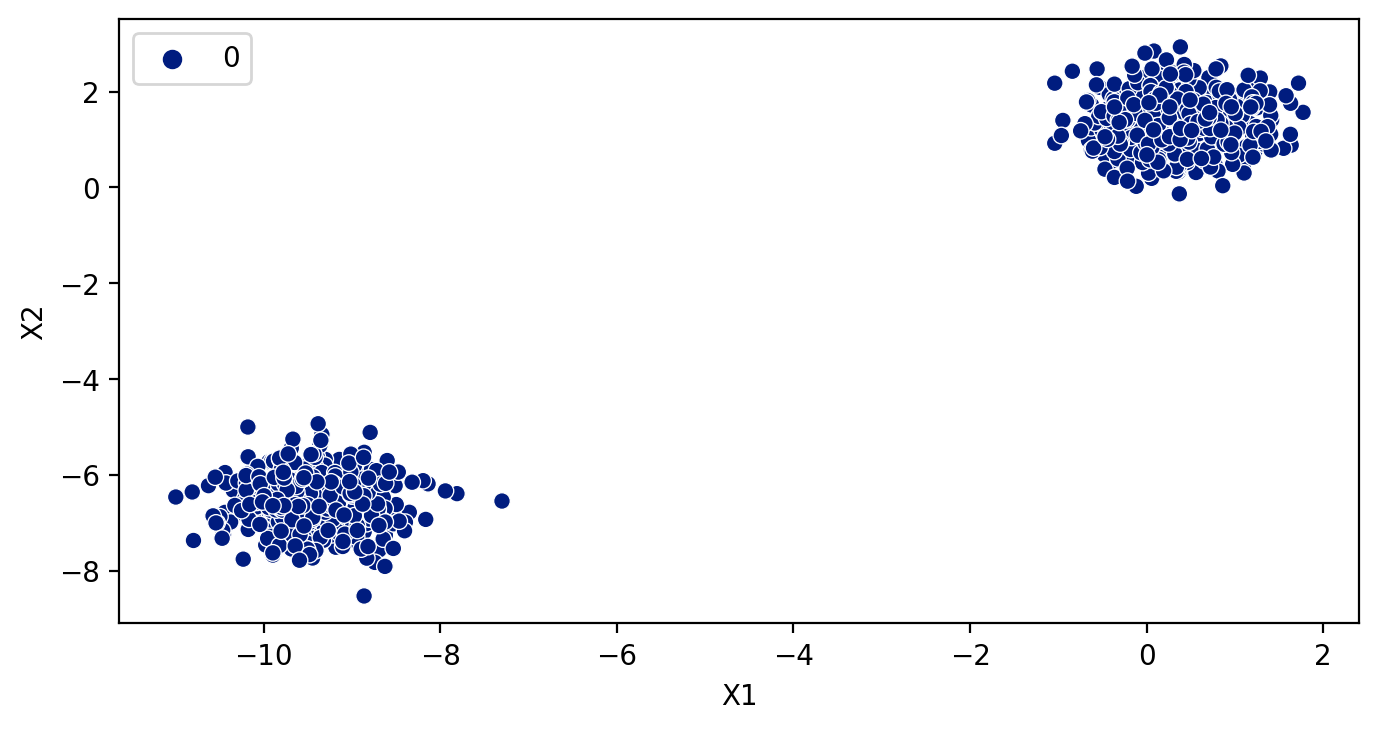

In [23]:
display_clusters(dbscan, blobs1)

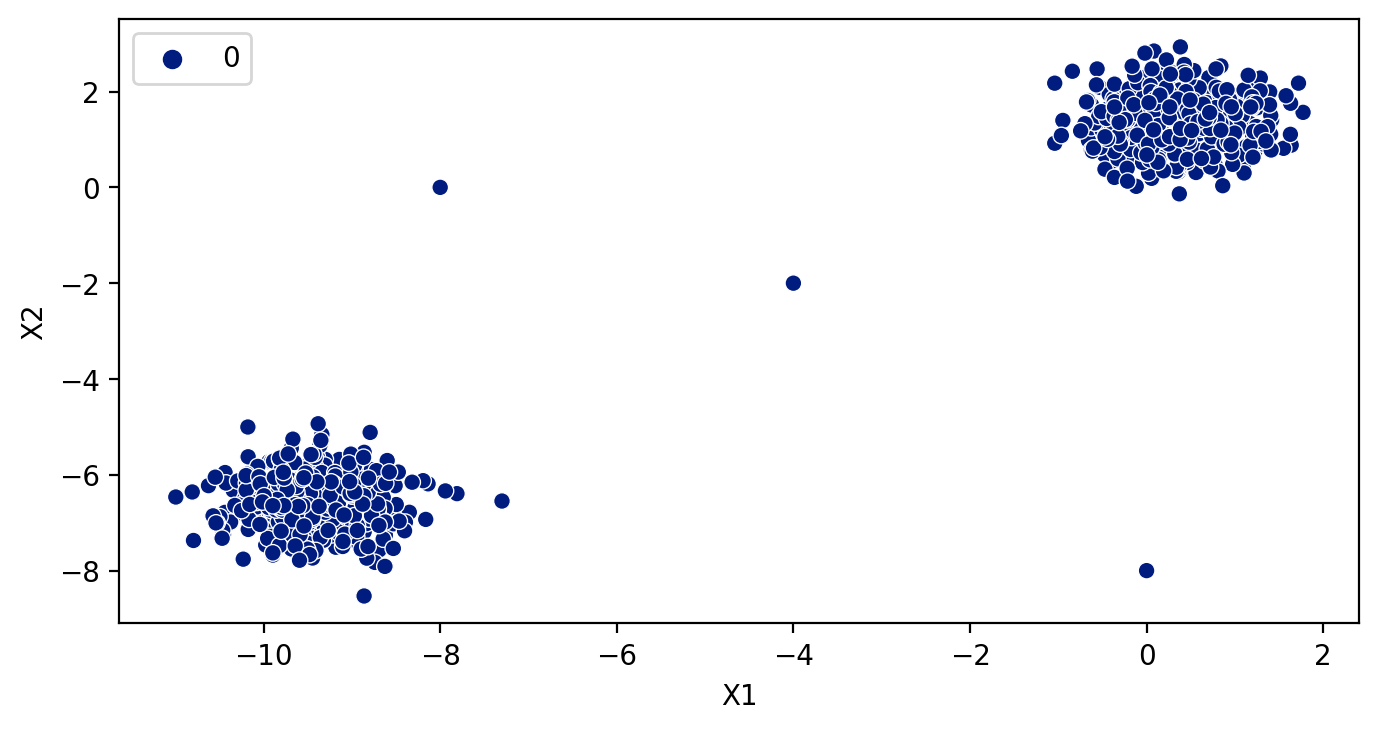

In [24]:
display_clusters(dbscan, blobs2)

### Finding Good Epsilon Value:

- We will use Blobs with Outliers.

- As we can see clearly, Blobs with Outliers Should have 2 clusters and 3 points in between should be Outliers.

- So, we will find an Epsilon value which gives us Desired Result.

- Using That, we will find a General Method to Decide Epsilon value for all Datasets.

In [26]:
dbscan = DBSCAN(eps= 0.75)

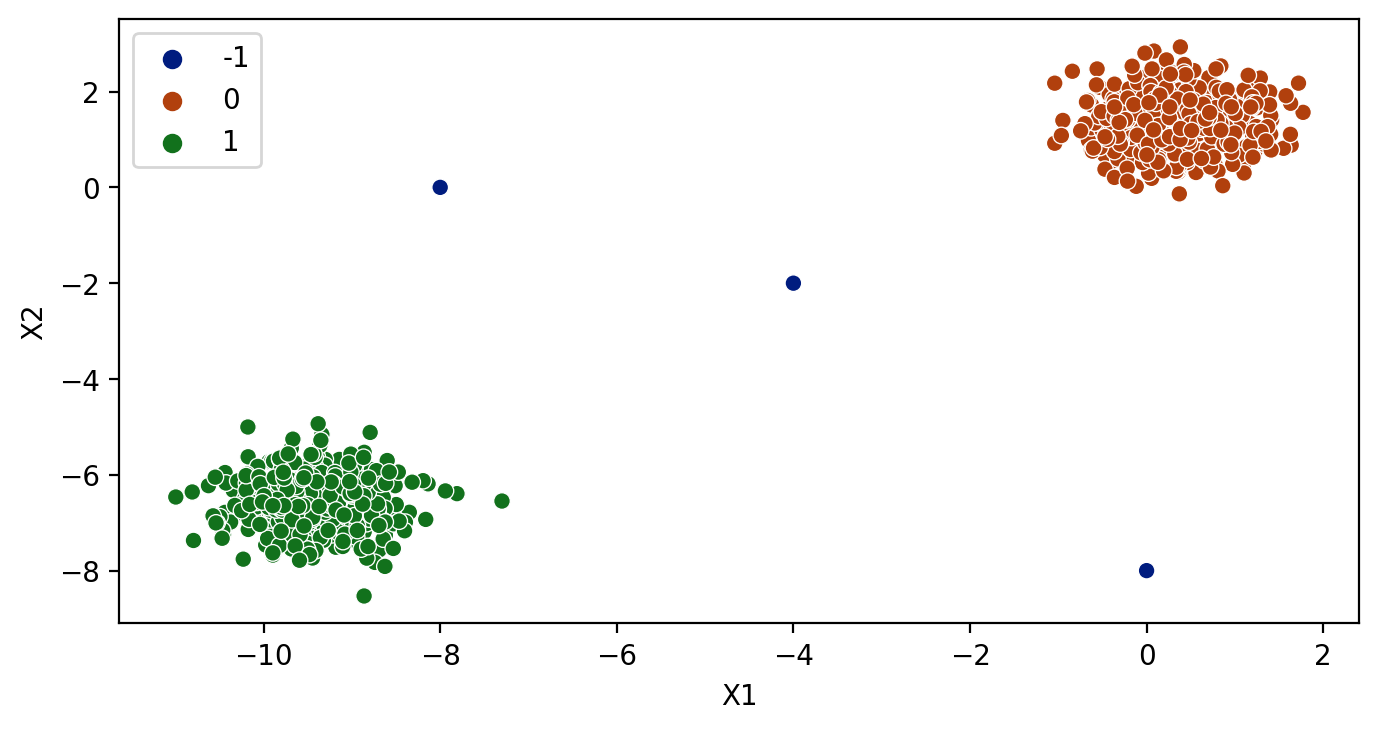

In [27]:
display_clusters(dbscan, blobs2)

In [ ]:
# So, Epsilon value of 0.75 works fine here.

In [28]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [29]:
# Finding How Many Points are Considered as Outliers:

dbscan.labels_ == -1 # -1 Label Denotes Outlier.

array([False, False, False, ...,  True,  True,  True])

In [31]:
np.sum(dbscan.labels_ == -1) # Number of Outlier points.

3

In [32]:
# Finding How Many Percentage of Points are Considered Outliers:

np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100 # percentage of Outlier Points.

0.29910269192422734

- Now, we can run a loop for different "eps" values and see how many points OR what Percentage of Points are considered
Outliers for that Epsilon Value.

- Using that, we can decide proper value of "eps".

In [33]:
num_of_outliers = []
percentage_of_outliers = []

for e in np.linspace(0.001, 10, 100):
    
    dbscan = DBSCAN(eps= e)
    
    dbscan.fit(blobs2)
    
    # Number of Outlier points
    num_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percentage of Outlier Points
    percentage_of_outliers.append(np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100)

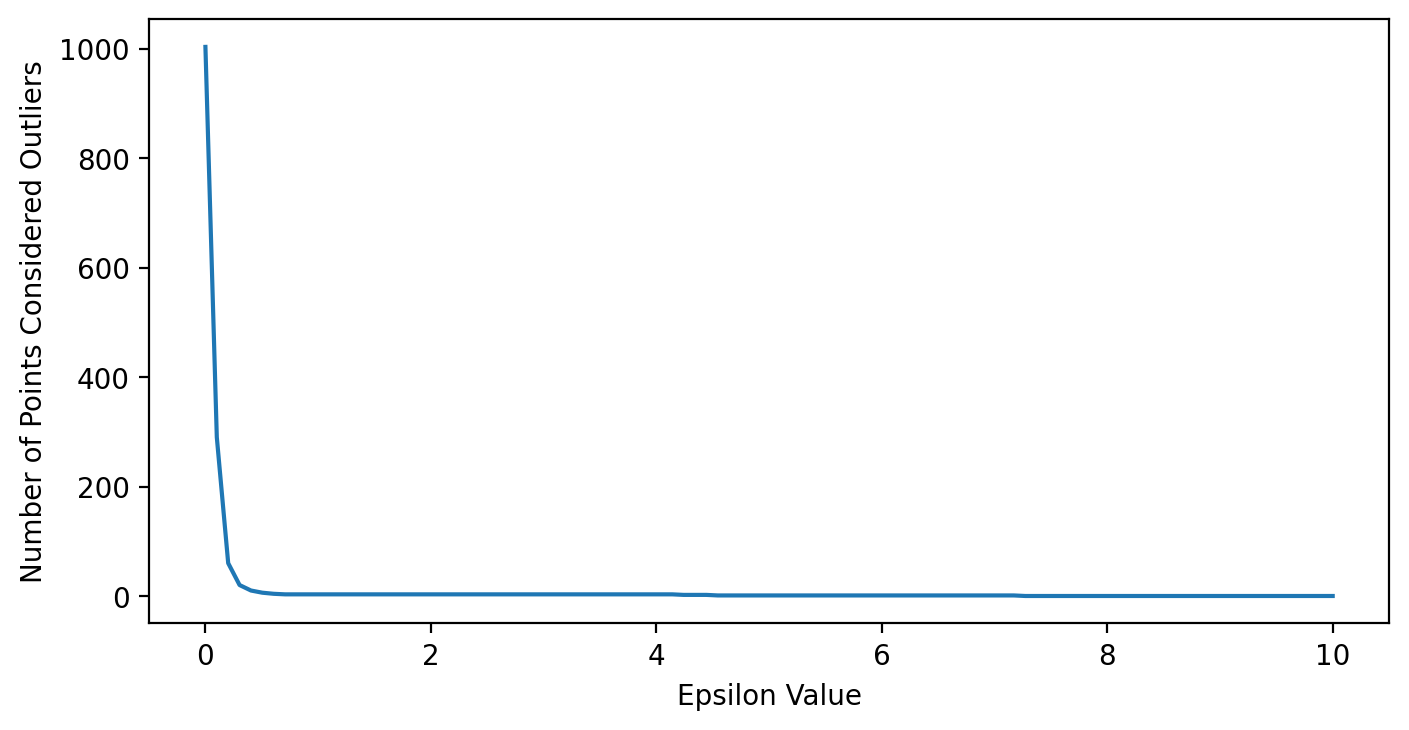

In [35]:
# Plotting Number of Outliers:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), num_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Points Considered Outliers")
plt.show()

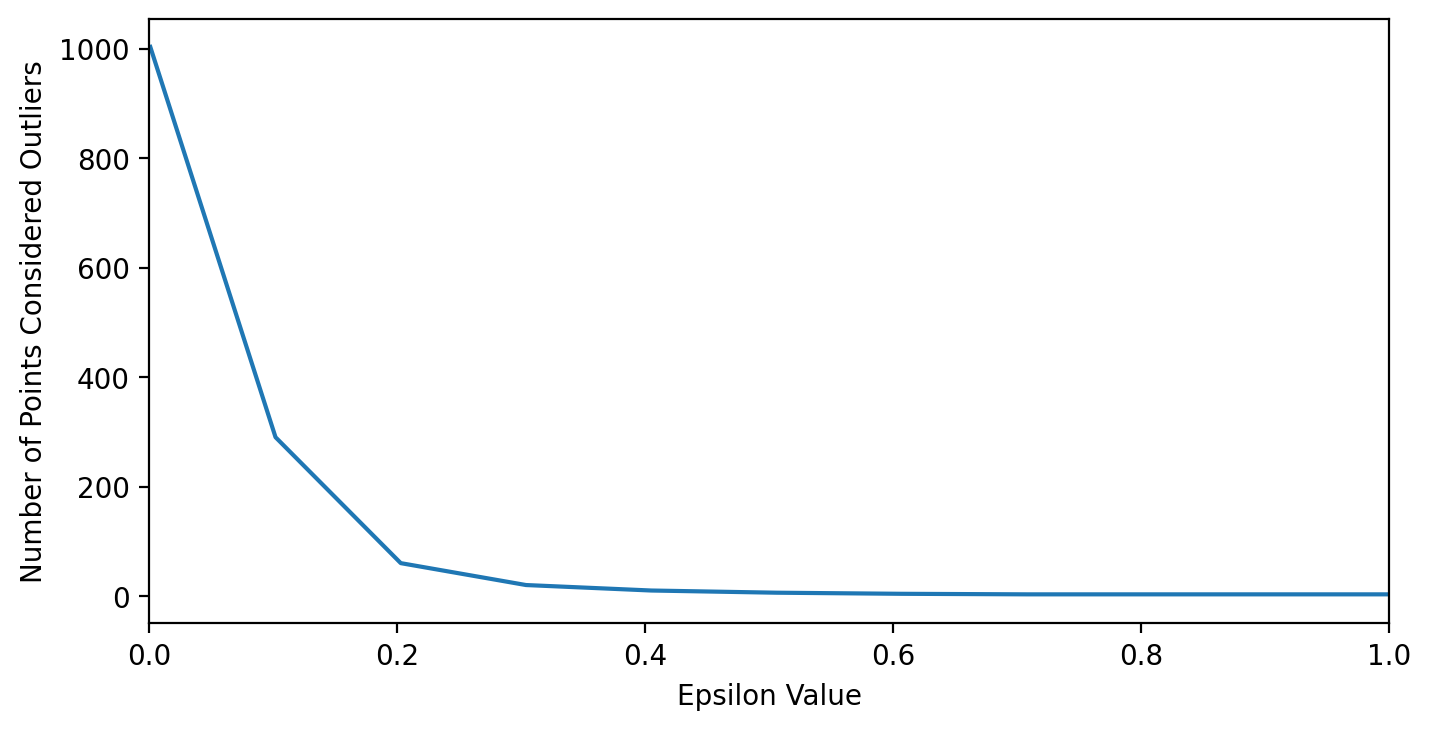

In [36]:
# We can cut x-limit to zoom in on Graph:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), num_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,1)
plt.show()

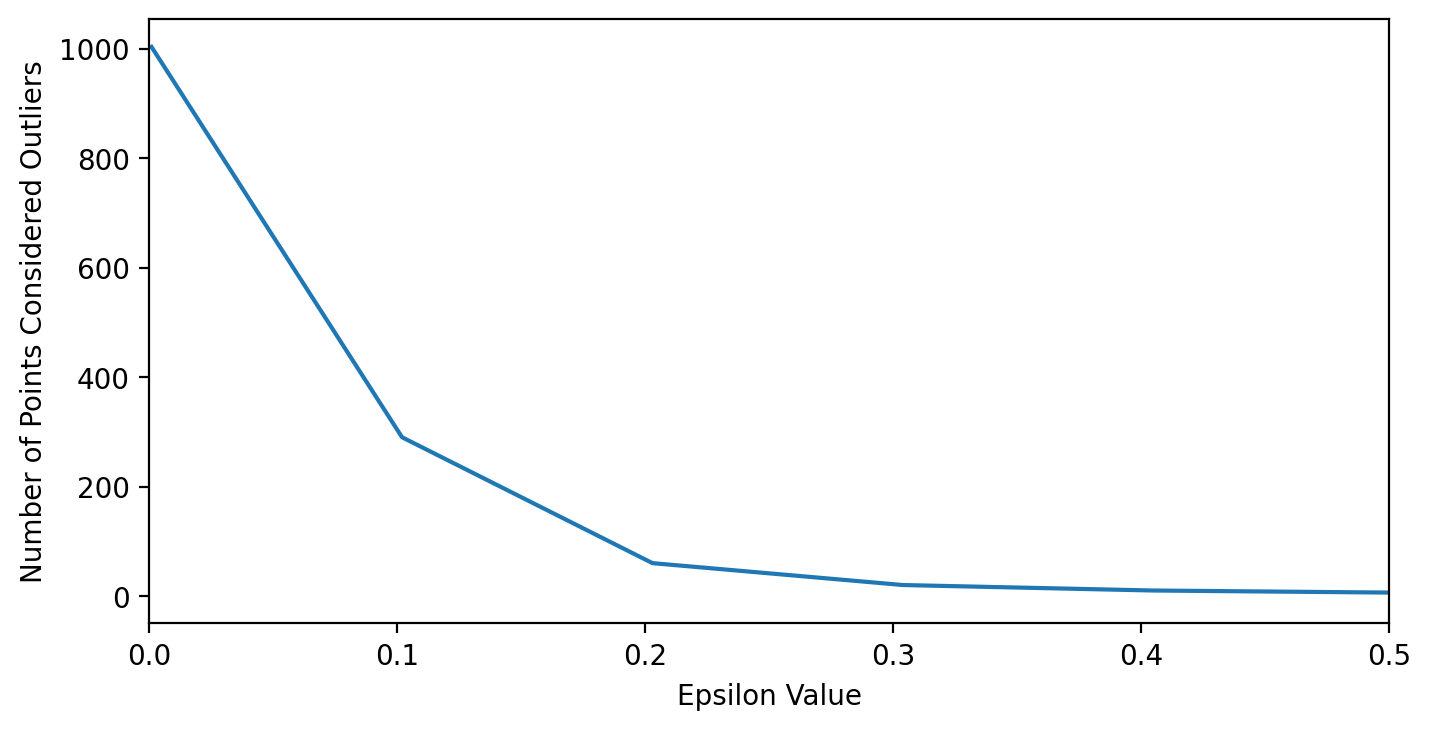

In [37]:
# We can cut x-limit to zoom in on Graph:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), num_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,0.5)
plt.show()

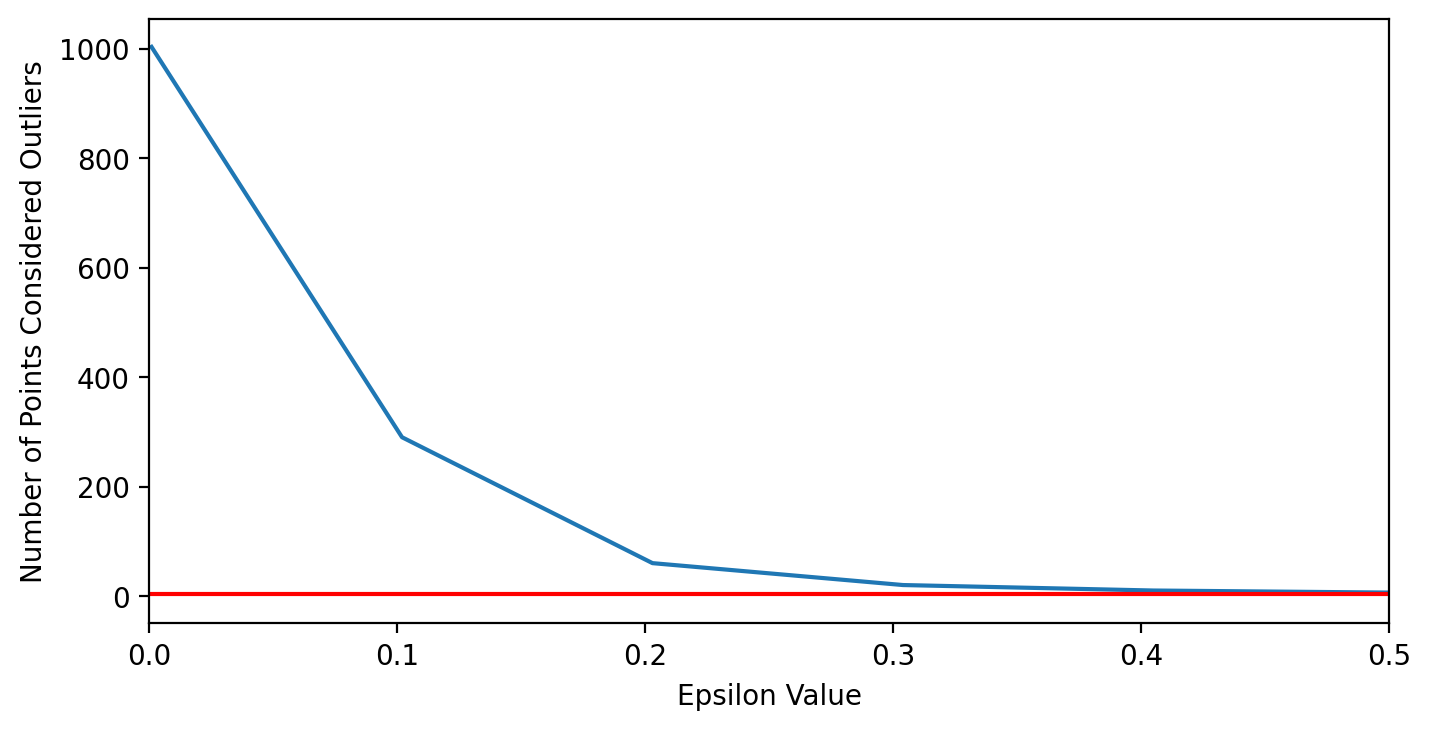

In [47]:
# We can Draw Line on Y-Axis for Y=3, to see exactly which value of epsilon is proper.

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), num_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,0.5)
plt.hlines(y=3, xmin=0, xmax=1, color= "red")
plt.show()

In [48]:
# Epsilon Value of 0.4 or 0.5 Seems to give us Desired Result.

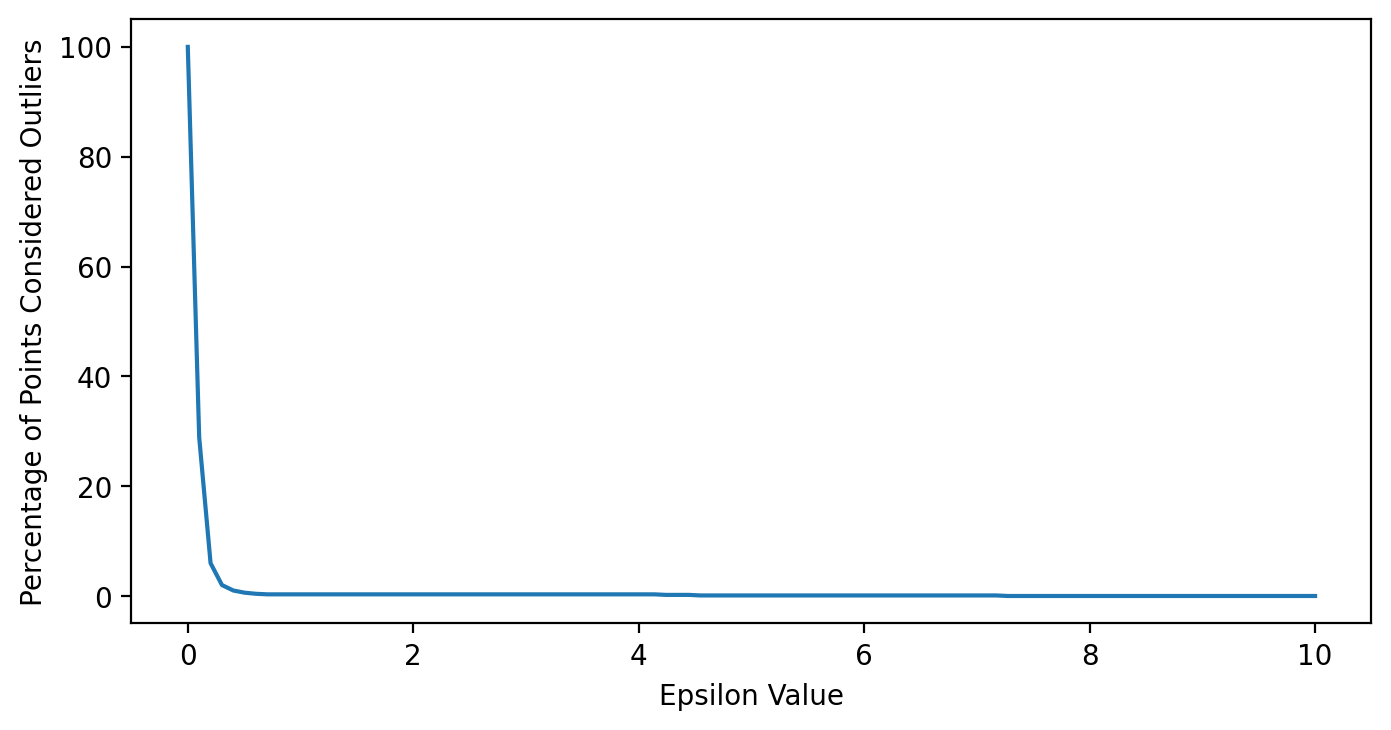

In [40]:
# Plotting Percentage of Outliers:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), percentage_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Considered Outliers")
plt.show()

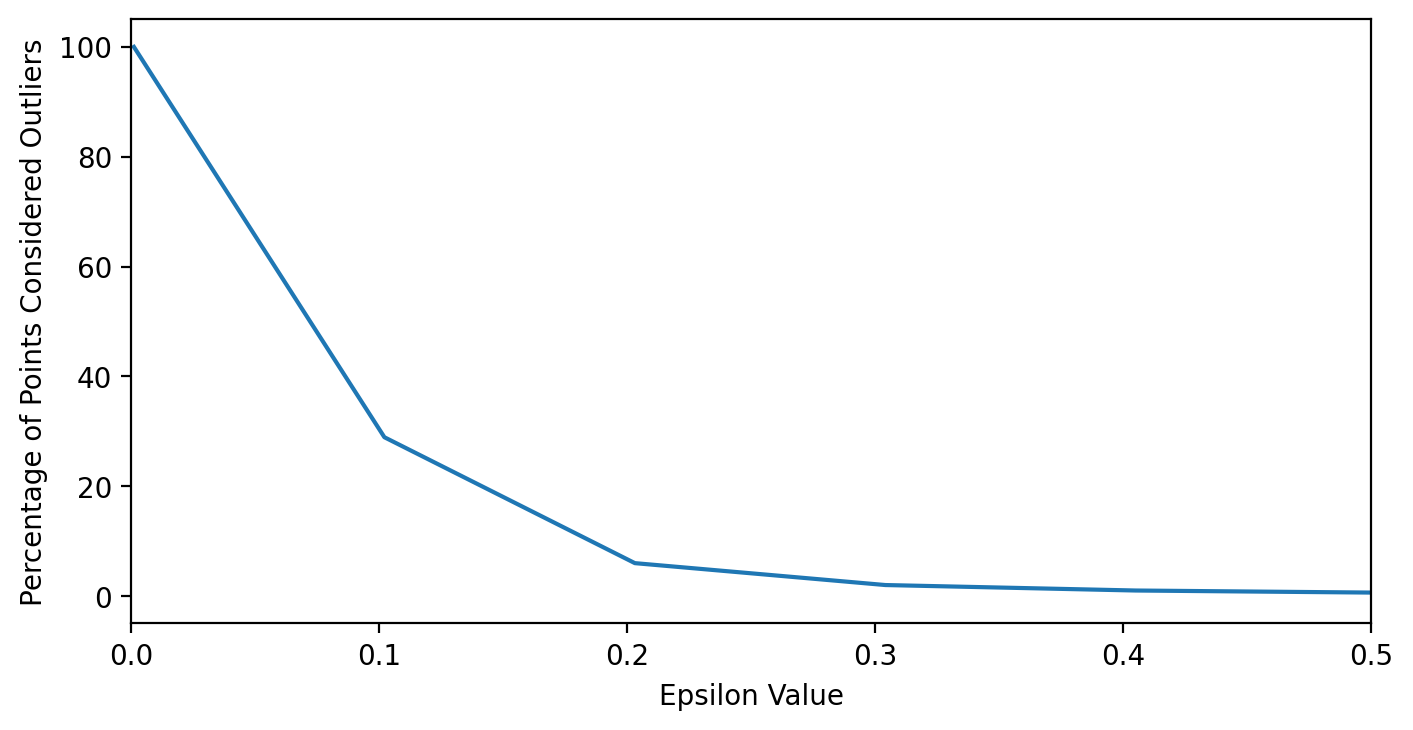

In [42]:
# We can cut x-limit to zoom in on Graph:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), percentage_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Considered Outliers")
plt.xlim(0,0.5)
plt.show()

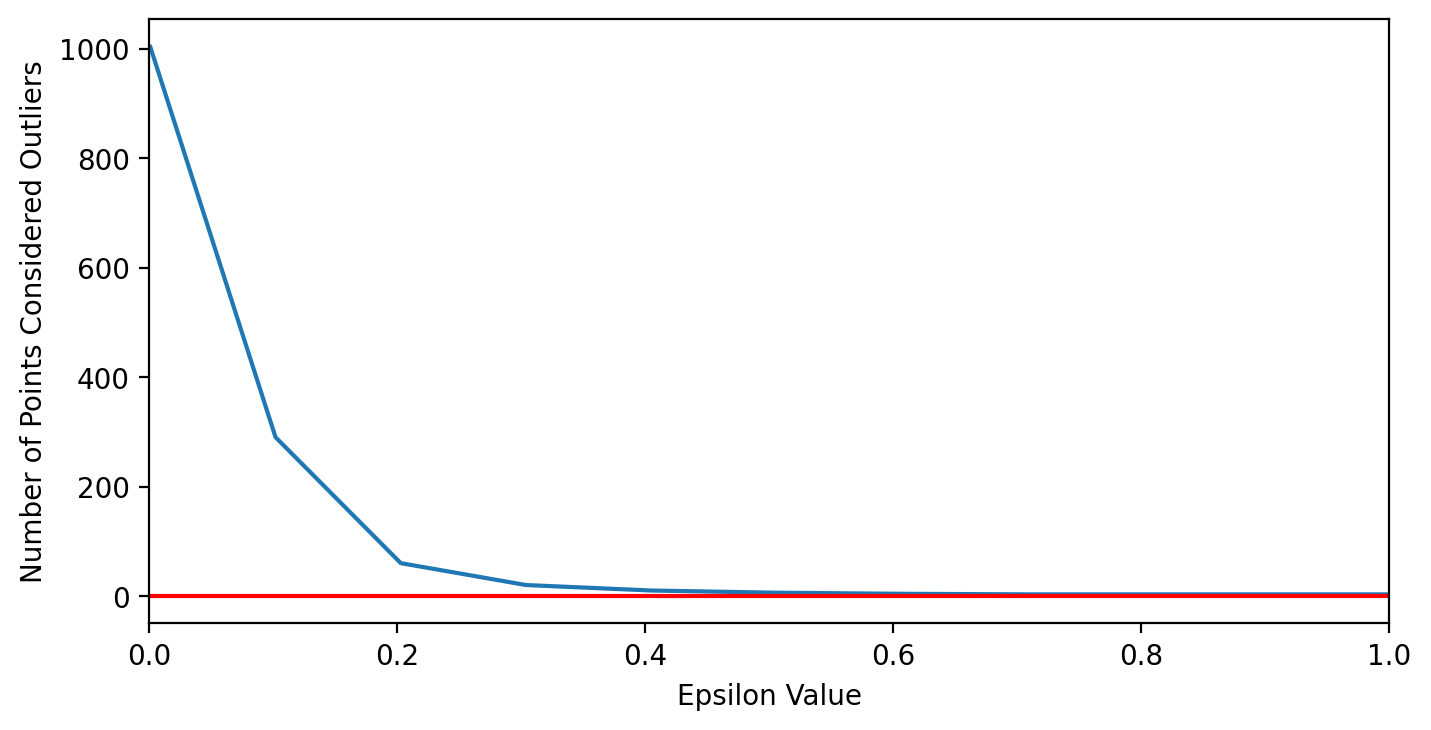

In [53]:
# We can Draw Line on Y-Axis for Y=0.3, to see exactly which value of epsilon is proper.

plt.figure(figsize= (8,4), dpi=200)
plt.plot(np.linspace(0.001, 10, 100), num_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,1)
plt.hlines(y=0.3, xmin=0, xmax=1, color= "red")
plt.show()

In [50]:
# here, 0.7 seems to be proper values of Epsilon.

In [54]:
dbscan = DBSCAN(eps= 0.7)

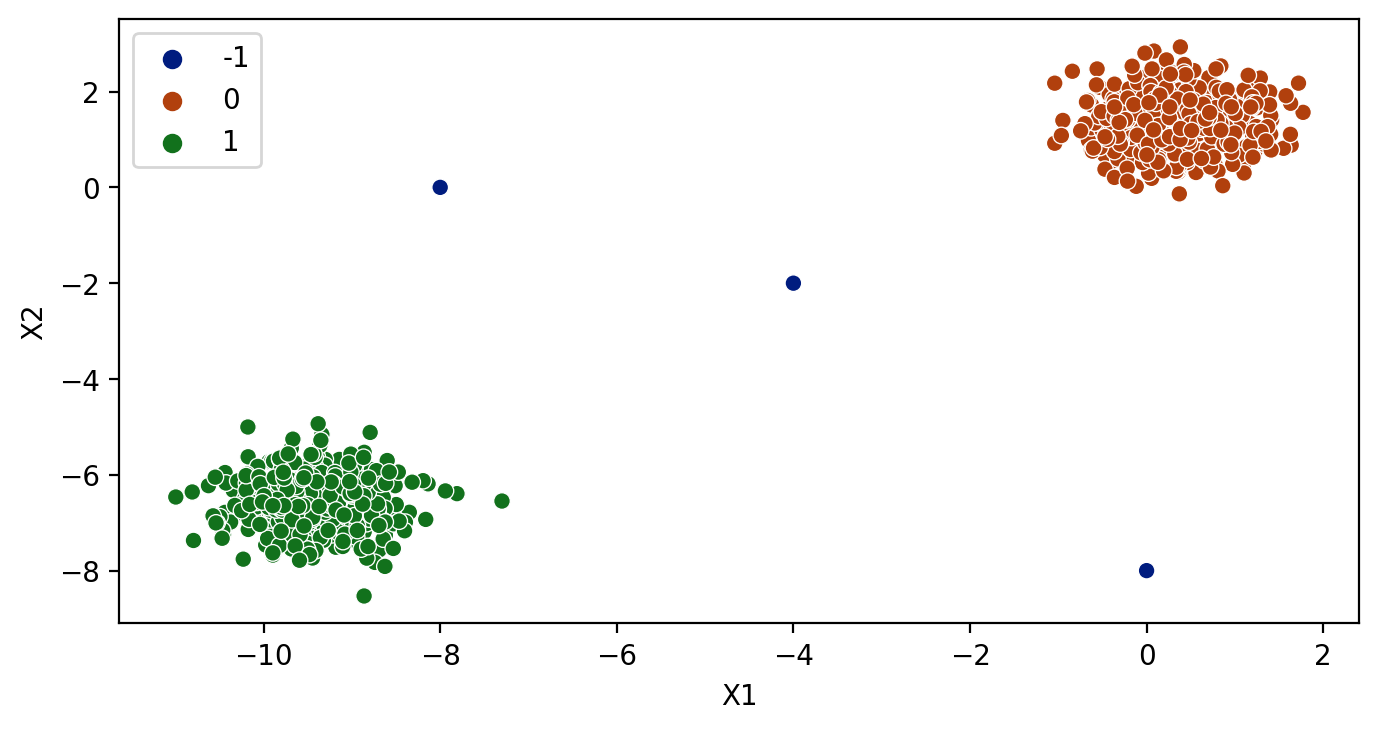

In [55]:
display_clusters(dbscan, blobs2)

In [56]:
np.sum(dbscan.labels_ == -1)

3

### Same Process Can Be done with Using "min_samples" parameter:

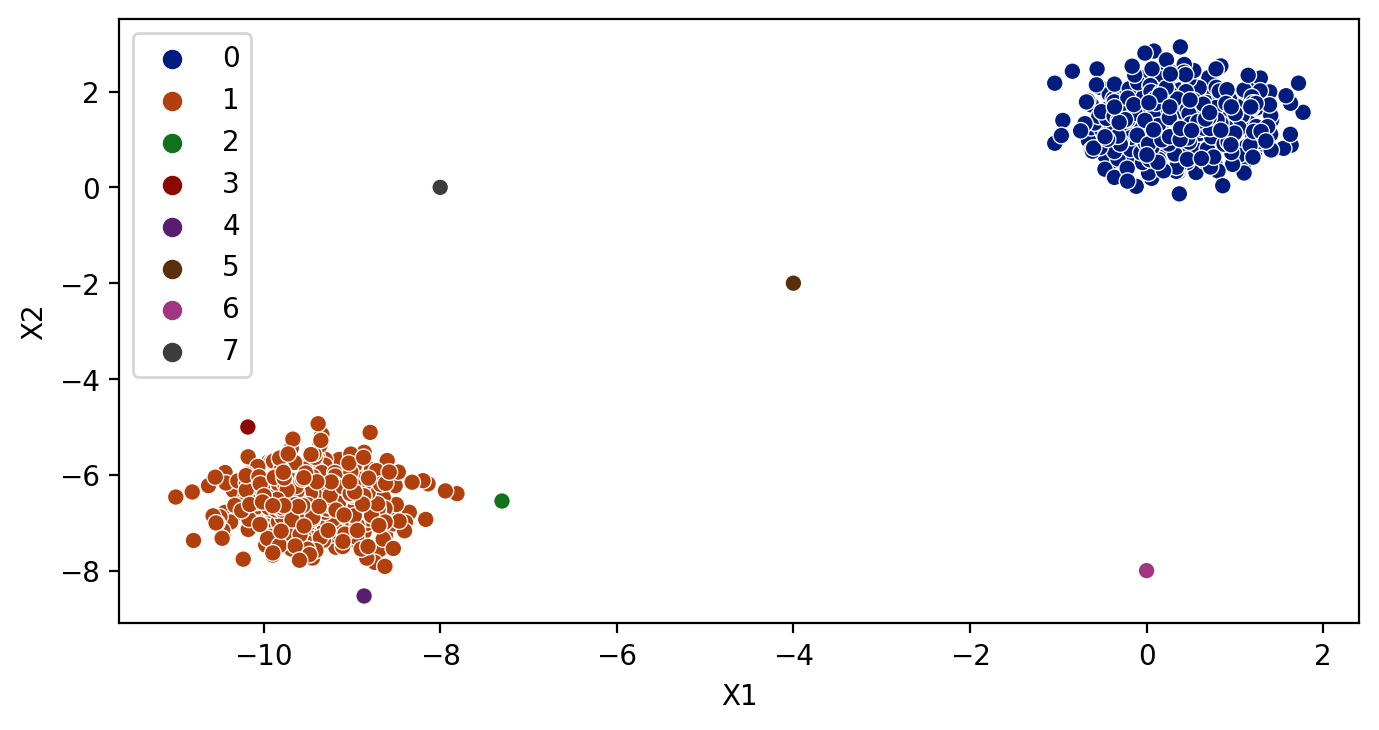

In [57]:
# Tiny min_smaples value = More Clusters

dbscan = DBSCAN(min_samples= 1)
display_clusters(dbscan, blobs2)

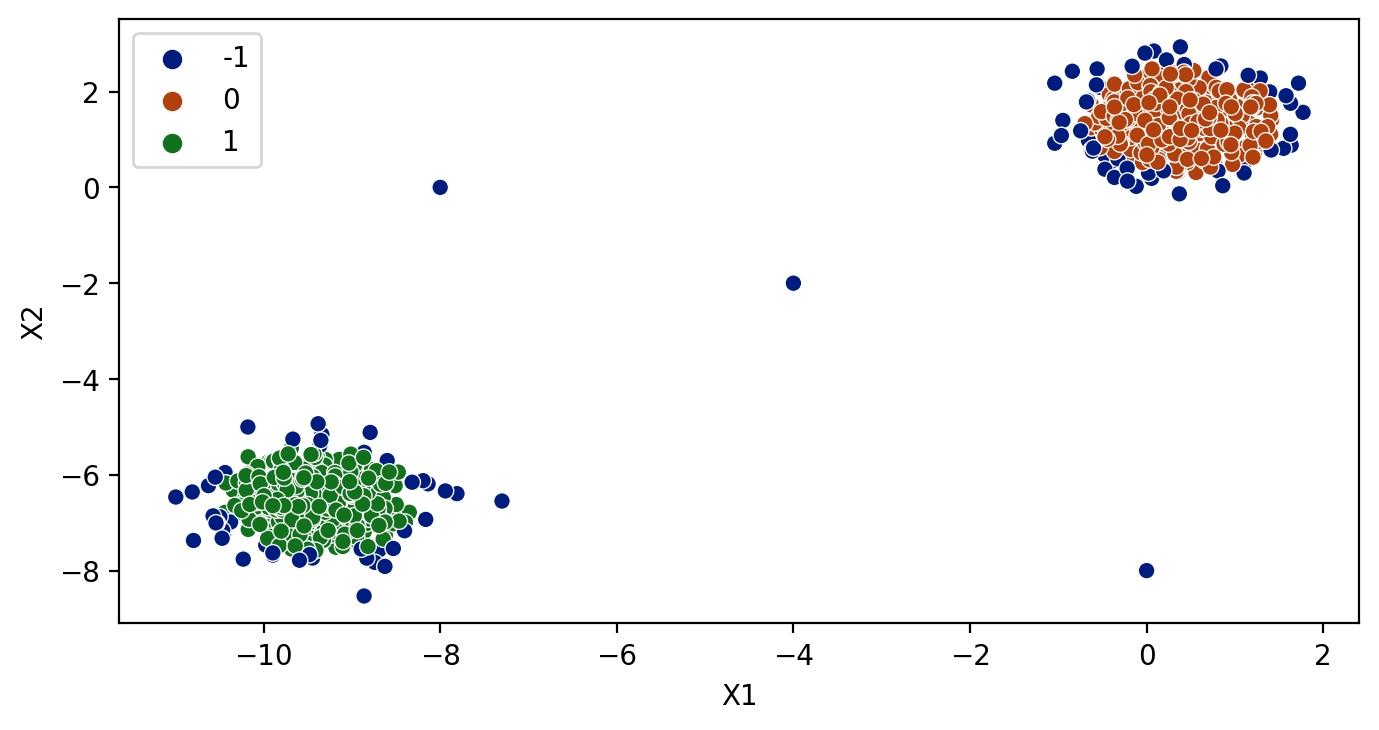

In [61]:
# Huge min_samples value = More Outliers

dbscan = DBSCAN(min_samples= 100)
display_clusters(dbscan, blobs2)

- Now, we can run a loop for different "min_samples" values and see how many points OR what Percentage of Points are considered
Outliers for that "min_samples Value.

- Using that, we can decide proper value of "min_samples".

In [92]:
num_of_outliers = []
percentage_of_outliers = []

for min_samp in range(1,101):
    
    dbscan = DBSCAN(eps= 0.7, min_samples= min_samp)
    
    dbscan.fit(blobs2)
    
    # Number of Outlier points
    num_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percentage of Outlier Points
    percentage_of_outliers.append(np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100)

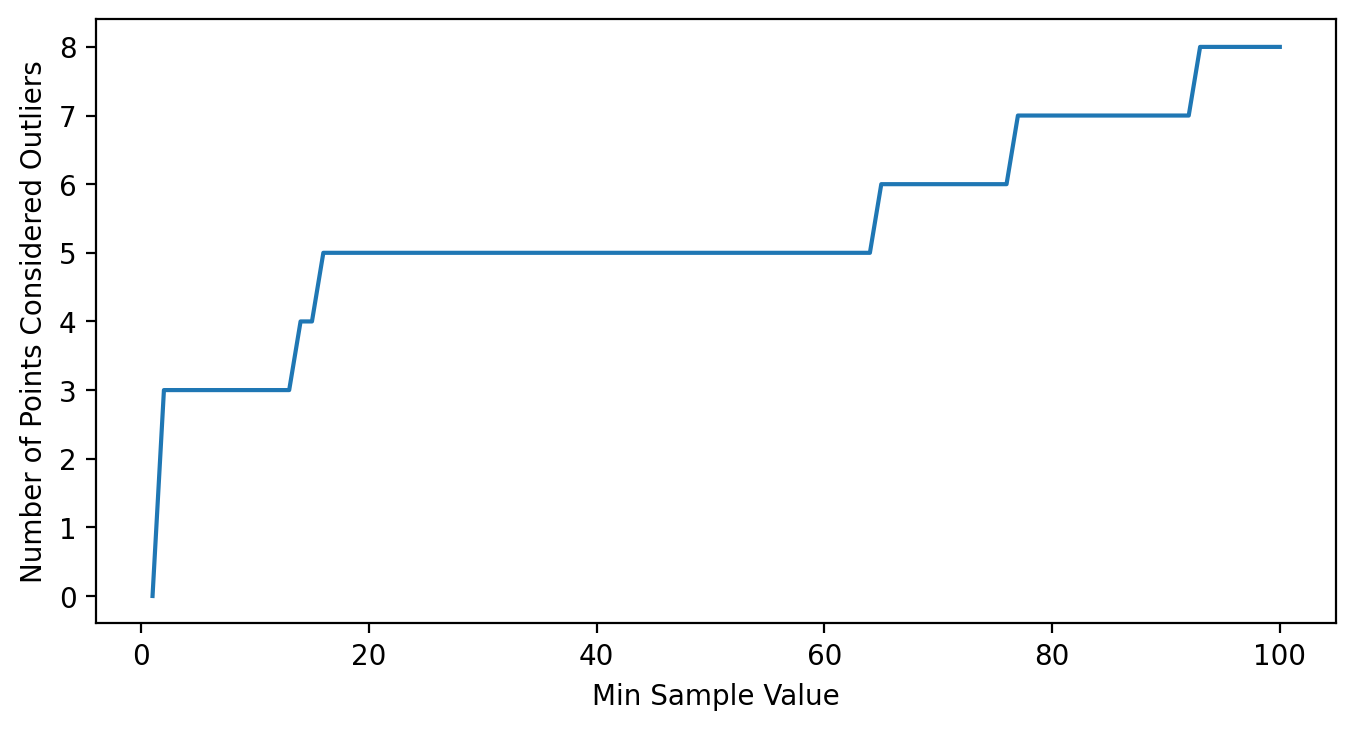

In [93]:
# Plotting Number of Outliers:

plt.figure(figsize= (8,4), dpi=200)
plt.plot(range(1,101), num_of_outliers)
plt.xlabel("Min Sample Value")
plt.ylabel("Number of Points Considered Outliers")
plt.show()

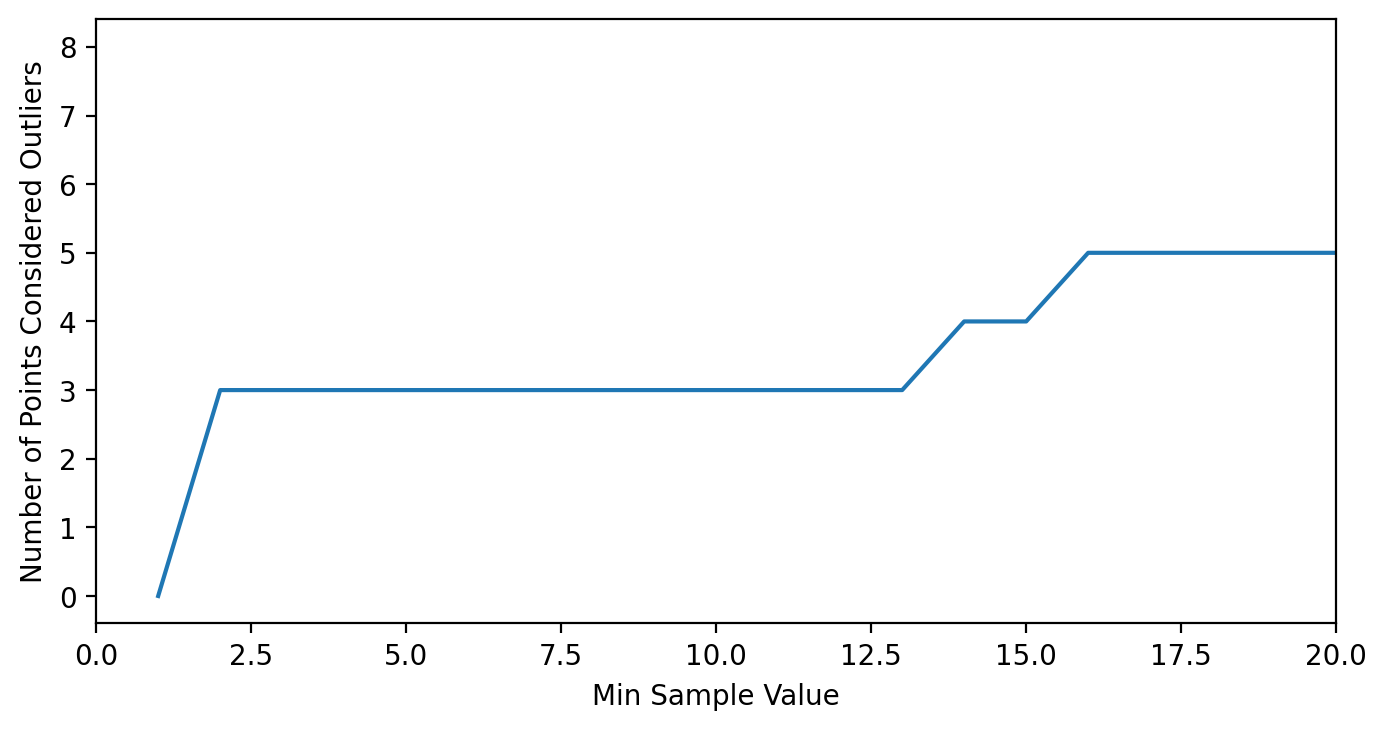

In [94]:
plt.figure(figsize= (8,4), dpi=200)
plt.plot(range(1,101), num_of_outliers)
plt.xlabel("Min Sample Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,20)
plt.show()

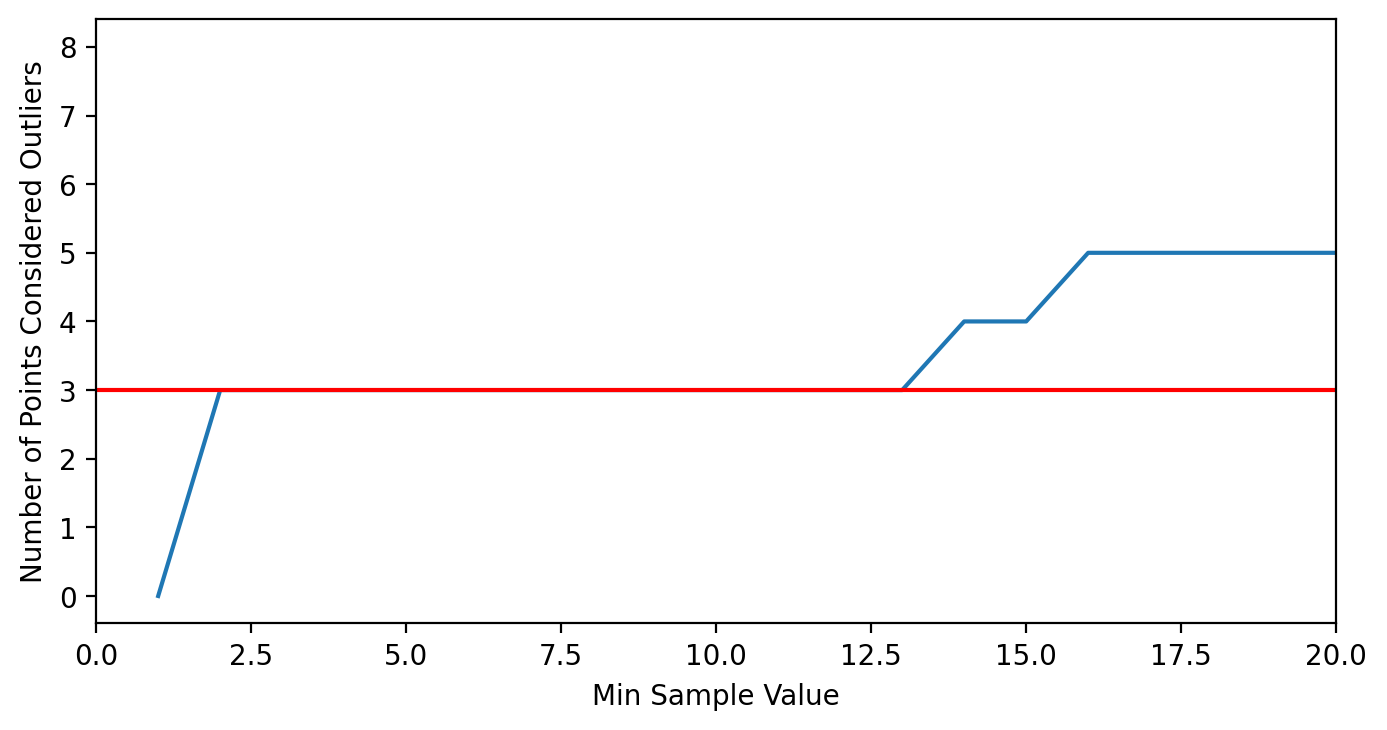

In [95]:
plt.figure(figsize= (8,4), dpi=200)
plt.plot(range(1,101), num_of_outliers)
plt.xlabel("Min Sample Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,20)
plt.hlines(y= 3, xmin= 0, xmax= 20, color= "red")
plt.show()

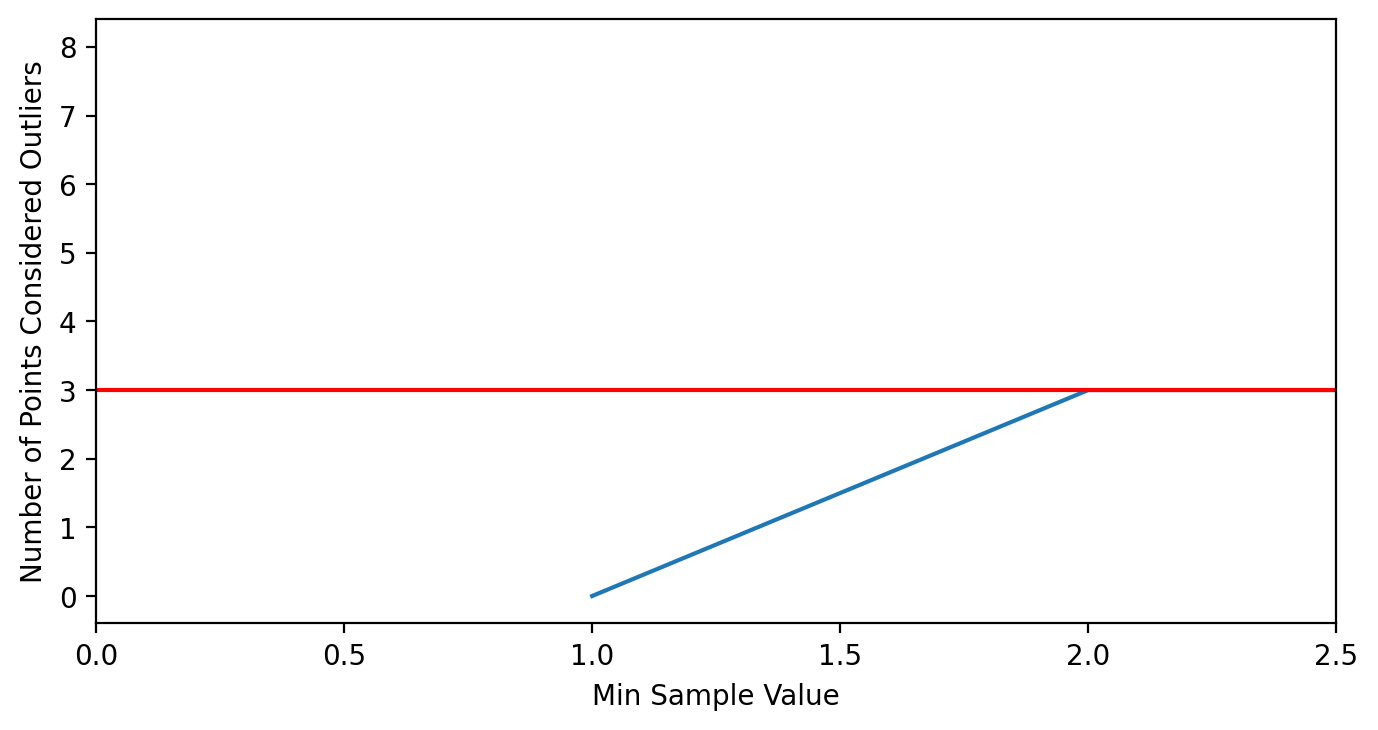

In [96]:
plt.figure(figsize= (8,4), dpi=200)
plt.plot(range(1,101), num_of_outliers)
plt.xlabel("Min Sample Value")
plt.ylabel("Number of Points Considered Outliers")
plt.xlim(0,2.5)
plt.hlines(y= 3, xmin= 0, xmax= 20, color= "red")
plt.show()

In [97]:
# 2 Seems to be proper value for "min_samples"

In [98]:
dbscan = DBSCAN(eps= 0.7, min_samples= 2)

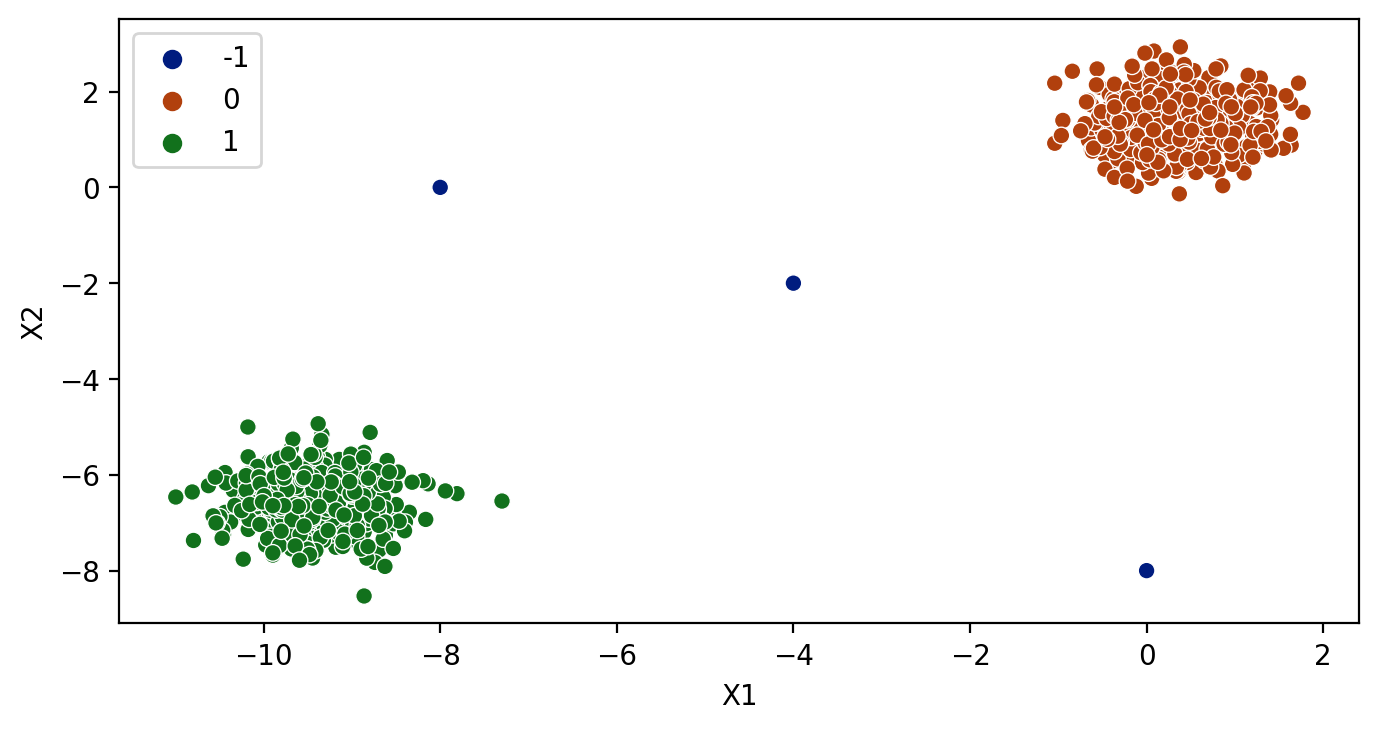

In [99]:
display_clusters(dbscan, blobs2)